# Decision Tree Classifier

## Compare Different impurity functions, i.e. entropy, classificiation error, Gini Index

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p = np.arange(0.0001,1,0.01)
q = 1-p

In [3]:
entropy = -p*np.log2(p)-q*np.log2(q)
gini = [x*(1-x)+(1-x)*x for x in p]#p*(1-p) + q*(1-q)
def classification_error(x):
    return 1-np.max([x,1-x])
ce = [classification_error(x) for x in p]

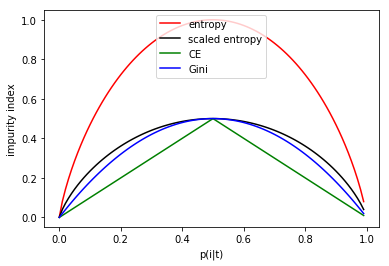

In [4]:
plt.figure()
plt.plot(p,entropy,color='red',label='entropy')
plt.plot(p,0.5*entropy,color='black',label='scaled entropy')
plt.plot(p,ce,color='green',label='CE')
plt.plot(p,gini,color='blue',label='Gini')
plt.xlabel('p(i|t)')
plt.ylabel('impurity index')
plt.legend(loc='upper center')
plt.show()

## Building A Decision Tree using Sklearn

In [5]:
# import data
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=1)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [8]:
from Perceptron import plot_decision_regions

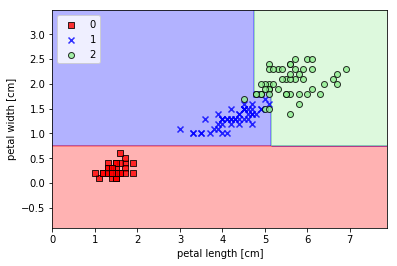

In [9]:
plot_decision_regions(X,y,classifier=tree)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

## visualize the decision tree

In [10]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [11]:
dot_data = export_graphviz(tree,filled=True,rounded=True,class_names=['Setosa','Versicolor','Virginica'],
                          feature_names=['petal length','petal width'], out_file=None)

In [12]:
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

## Random Forests

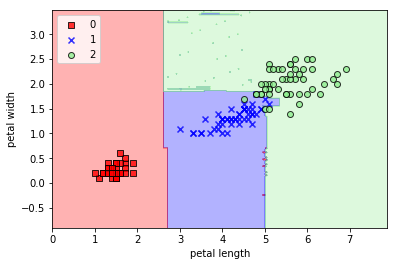

In [13]:
 from sklearn.ensemble import RandomForestClassifier
    
 forest = RandomForestClassifier(criterion='gini',
     n_estimators=25,
     random_state=1,
     n_jobs=2)
 forest.fit(X_train, y_train)
 
 plot_decision_regions(X, y,
     classifier=forest)
 plt.xlabel('petal length')
 plt.ylabel('petal width')
 plt.legend(loc='upper left')
 plt.show()
